<a href="https://colab.research.google.com/github/Hanief00/PCVK_GANJIL_2024/blob/main/Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama  : Hanief Mochsin
* Kelas : TI-3E
* Absen : 15
* NIM   : 2241720181

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan50


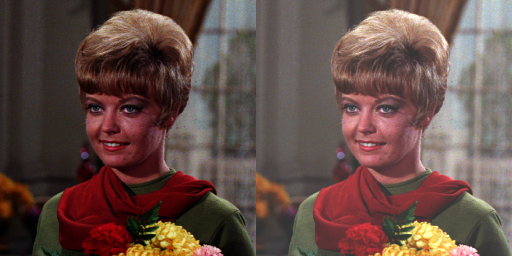

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan'))
except ValueError:
  print('Error, Bukan angka -> Nilai harus berupa angka')

original = cv.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_3/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

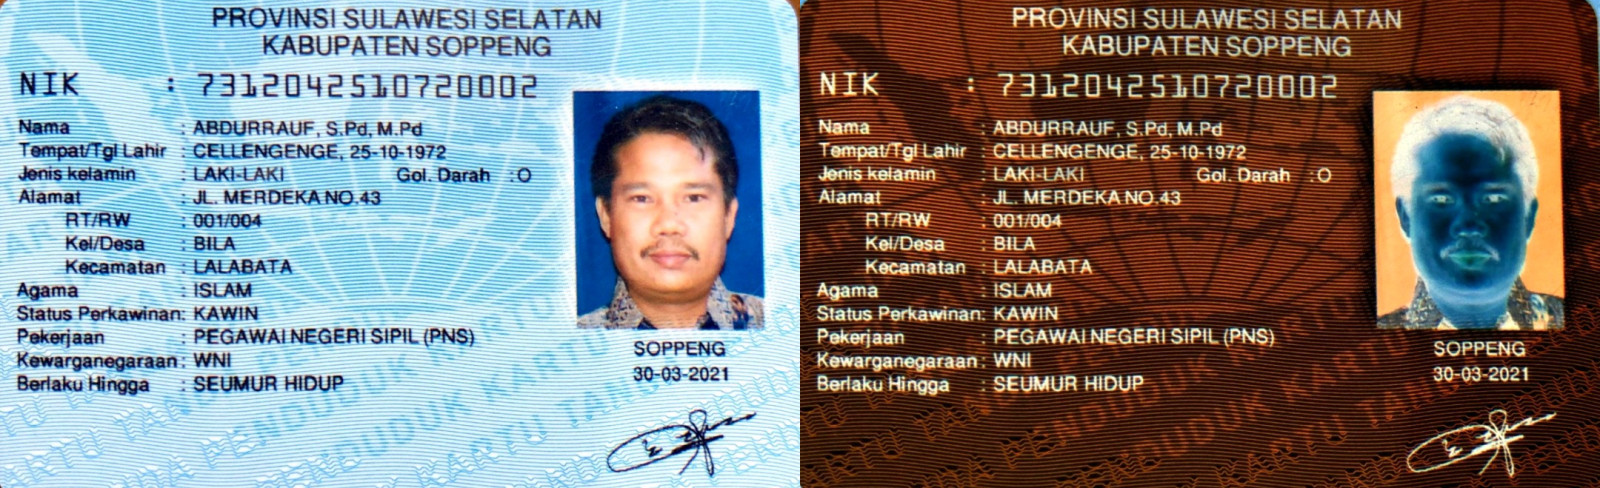

In [3]:
ktp = cv.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_3/KTP.jpeg')

inverse_image = 255 - ktp

final_frame = cv.hconcat((ktp, inverse_image))
cv2_imshow(final_frame)

Mengubah kontras dan kecerahan citra
------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras[1.0 - 3.0]: 2


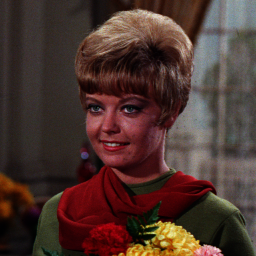

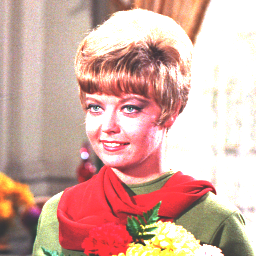

In [4]:
print('Mengubah kontras dan kecerahan citra')
print('------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras[1.0 - 3.0]: '))
except ValueError:
  print('Error, Bukan angka -> Nilai harus berupa angka')

original1 = cv.imread('/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_3/female.tiff')
brightness_image = cv.convertScaleAbs(original1, beta=brightness)

transform = contrast * original1 + brightness_image

cv2_imshow(original1)
cv2_imshow(transform)


Mengubah tingkat kecerahan citra dengan Transformasi log
-----------------------------------------------------
Masukkan nilai kecerahan : 50


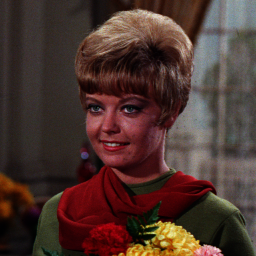

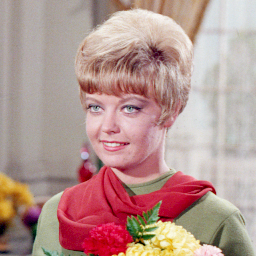

In [5]:
def logarithmic_transform(image, c):
    # Mengubah ke float untuk menghindari overflow
    log_image = c * np.log1p(image.astype(np.float32))

    # Normalisasi ke rentang 0-255 dan ubah kembali ke tipe uint8
    log_image = cv.normalize(log_image, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

    return log_image

# Membaca gambar
image = original1

if image is None:
    print("Tidak dapat membaca gambar dari image")
else:
    print('Mengubah tingkat kecerahan citra dengan Transformasi log')
    print('-----------------------------------------------------')
    try:
      c = float(input('Masukkan nilai kecerahan : '))
    except ValueError:
      print('Error, Bukan angka! -> Nilai harus berupa angka')

    # Transformasi logarithmic brightness
    transformed_image = logarithmic_transform(image, c)

    cv2_imshow(image)
    cv2_imshow(transformed_image)

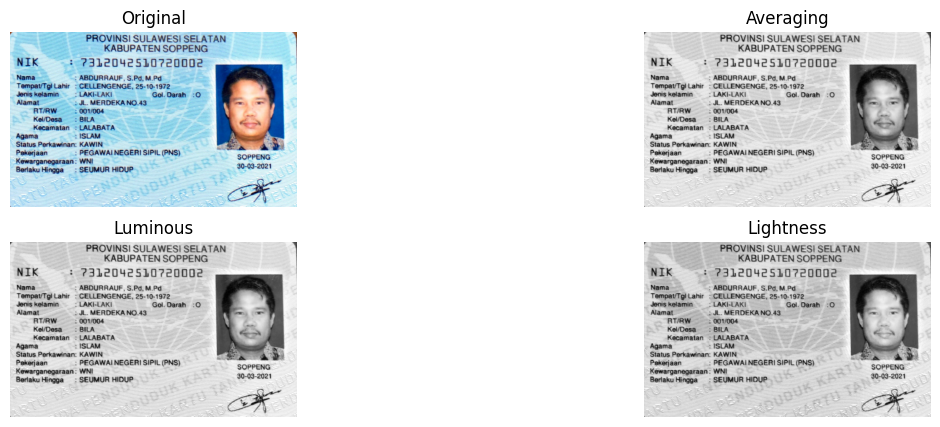

In [21]:
import matplotlib.pyplot as plt

photo_data1 = ktp

photo_data = cv.cvtColor(photo_data1, cv.COLOR_BGR2RGB)

# Ubah gambar menjadi grayscale averaging dengan cara menghitung rata-rata RGB
photo_data_gray = cv.cvtColor(photo_data, cv.COLOR_BGR2GRAY)

# Luminous:

# Bobot untuk RGB
W = [0.2, 0.5, 0.3]

# Hitung rata-rata bobot
W_mean = np.tensordot(photo_data, W, axes=((-1, -1)))[..., None]

# Konversi menjadi tipe data asli gambar
photo_data_luminous = W_mean.astype(photo_data.dtype)

# Lightness:

# Hitung nilai lightness dengan mengambil rata-rata dari max dan min kanal RGB
max_val = np.max(photo_data, axis=-1, keepdims=True)
min_val = np.min(photo_data, axis=-1, keepdims=True)
photo_data_lightness = (max_val / 2) + (min_val / 2)

# Konversi menjadi tipe data asli gambar (misalnya uint8)
photo_data_lightness = photo_data_lightness.astype(photo_data.dtype)

  # Tampilkan gambar-gambar menggunakan subplots
plt.figure(figsize=(15, 5))

# Tampilkan Original
plt.subplot(2, 2, 1)
plt.imshow(photo_data, cmap='gray')
plt.title('Original')
plt.axis('off')

# Tampilkan grayscale averaging
plt.subplot(2, 2, 2)
plt.imshow(photo_data_gray, cmap='gray')
plt.title('Averaging')
plt.axis('off')

# Tampilkan luminous
plt.subplot(2, 2, 3)
plt.imshow(photo_data_luminous, cmap='gray')
plt.title('Luminous')
plt.axis('off')

# Tampilkan lightness
plt.subplot(2, 2, 4)
plt.imshow(photo_data_lightness, cmap='gray')
plt.title('Lightness')
plt.axis('off')

plt.show()

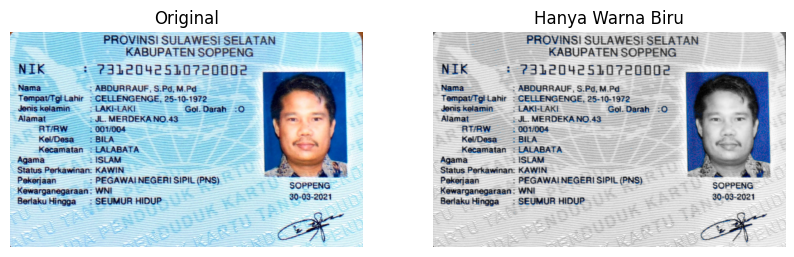

In [26]:
import cv2

photo_data = ktp

# Konversi gambar ke ruang warna HSV
hsv = cv2.cvtColor(photo_data, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna biru dalam ruang warna HSV
lower_blue = np.array([100, 150, 50])  # Rentang bawah warna biru
upper_blue = np.array([140, 255, 255])  # Rentang atas warna biru

# Buat masker untuk warna biru
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Pisahkan bagian gambar yang hanya berwarna biru
blue_part = cv2.bitwise_and(photo_data, photo_data, mask=mask_blue)

# Konversi citra asli menjadi grayscale
gray_photo = cv2.cvtColor(photo_data, cv2.COLOR_BGR2GRAY)

# Ubah grayscale menjadi citra 3 channel untuk bisa digabung dengan citra berwarna
gray_3_channel = cv2.cvtColor(gray_photo, cv2.COLOR_GRAY2BGR)

# Gabungkan citra grayscale dengan bagian biru
final_image = np.where(blue_part == 0, gray_3_channel, blue_part)

# Tampilkan gambar
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(photo_data, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Hanya Warna Biru")
plt.axis('off')

plt.show()
